# KNN

    https://www.cnblogs.com/fushengweixie/p/8196371.html    
    
    kNN算法是比较好理解，也比较容易编写的分类算法。

    简单地说，kNN算法采用测量不同特征值之间的距离方法进行分类。

    我们可以假设在一个N维空间中有很多个点，然后这些点被分为几个类。相同类的点，肯定是聚集在一起的，它们之间的距离相比于和其他类的点来说，非常近。如果现在有个新的点，我们不知道它的类别，但我们知道了它的坐标，那只要计算它和已存在的所有点的距离，然后以最近的k个点的多数类作为它的类别，则完成了它的分类。这个k就是kNN中的k值。

    举个例子：我们知道地球是有经纬度的，中国人肯定绝大多数都集中在中国的土地上，美国人也一样多数都集中在自己的土地上。如果现在给我们某个人的坐标，让我们给它分类，判断他是哪国人。我们计算了他和世界上每个人的距离，然后取离他最近的k个人中最多国别的国别作为他的国别。这样我们就完成了他的国别分类。（当然也有可能一个外国人正好来中国游玩，我们错误的将他分类为中国人了，这个只是举例，不要在意这些细节啦 ^_^）

    所以kNN算法无非就是计算一个未知点与所有已经点的距离，然后根据最近的k个点类别来判断它的类别。简单，粗暴，实用。
    
    kNN算法的重点


    （1）怎么度量邻近度

    我们首先想到的肯定是点和点之间距离。但除了距离，其实我们也可以考虑两个点之间的相似度，越相似，就代表两个点距离越近。同理，我们也可以考虑相异度，越相异，就代表两个点距离越远。其实距离的度量就是相异性度量的其中一种。

    （2）k值怎么取

    k值的选取关乎整个分类器的性能。如果k值取得过小，容易受噪点的影响而导致分类错误。而k值取得过大，又容易分类不清，混淆了其他类别的点。

    （3）数据的预处理

    拿到数据，我们不能直接就开始套用算法，而是需要先规范数据。例如我们想通过一个人的年龄和工资来进行分类，很明显工资的数值远大于年龄，如果我们不对它进行一个统一的规范，必然工资这个特征会左右我们的分类，而让年龄这个特征无效化，这不是我们想看到的。    

In [7]:
import numpy as np  
from sklearn import neighbors 
 
knn = neighbors.KNeighborsClassifier() #取得knn分类器  
data = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]]) #data对应着打斗次数和接吻次数
labels = np.array([1,1,1,2,2,2]) #labels则是对应Romance和Action
knn.fit(data,labels) #导入数据进行训练 
print(knn.predict([[101,8],[3,110]]))

[2 1]


# 随机森林

    http://www.cnblogs.com/maybe2030/p/4585705.html
    
    随机森林就是通过集成学习的思想将多棵树集成的一种算法，它的基本单元是决策树，而它的本质属于机器学习的一大分支——集成学习（Ensemble Learning）方法。随机森林的名称中有两个关键词，一个是“随机”，一个就是“森林”。“森林”我们很好理解，一棵叫做树，那么成百上千棵就可以叫做森林了，这样的比喻还是很贴切的，其实这也是随机森林的主要思想--集成思想的体现。“随机”的含义我们会在下边部分讲到。

    其实从直观角度来解释，每棵决策树都是一个分类器（假设现在针对的是分类问题），那么对于一个输入样本，N棵树会有N个分类结果。而随机森林集成了所有的分类投票结果，将投票次数最多的类别指定为最终的输出，这就是一种最简单的 Bagging 思想。
    
    随机森林的特点
    
    1)在当前所有算法中，具有极好的准确率/It is unexcelled in accuracy among current algorithms；
    2)能够有效地运行在大数据集上/It runs efficiently on large data bases；
    3)能够处理具有高维特征的输入样本，而且不需要降维/It can handle thousands of input variables without variable deletion；
    4)能够评估各个特征在分类问题上的重要性/It gives estimates of what variables are important in the classification；
    5)在生成过程中，能够获取到内部生成误差的一种无偏估计/It generates an internal unbiased estimate of the generalization error as the forest building progresses；
    6)对于缺省值问题也能够获得很好得结果/It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing
    随机森林是集成学习的一个子类，它依靠于决策树的投票选择来决定最后的分类结果。你可以在这找到用python实现集成学习的文档：Scikit 学习文档。
    
    随机森林的生成
    
    前面提到，随机森林中有许多的分类树。我们要将一个输入样本进行分类，我们需要将输入样本输入到每棵树中进行分类。打个形象的比喻：森林中召开会议，讨论某个动物到底是老鼠还是松鼠，每棵树都要独立地发表自己对这个问题的看法，也就是每棵树都要投票。该动物到底是老鼠还是松鼠，要依据投票情况来确定，获得票数最多的类别就是森林的分类结果。森林中的每棵树都是独立的，99.9%不相关的树做出的预测结果涵盖所有的情况，这些预测结果将会彼此抵消。少数优秀的树的预测结果将会超脱于芸芸“噪音”，做出一个好的预测。将若干个弱分类器的分类结果进行投票选择，从而组成一个强分类器，这就是随机森林bagging的思想（关于bagging的一个有必要提及的问题：bagging的代价是不用单棵决策树来做预测，具体哪个变量起到重要作用变得未知，所以bagging改进了预测准确率但损失了解释性。）。
    
    
    随机森林工作原理解释的一个简单例子
    
    描述：根据已有的训练集已经生成了对应的随机森林，随机森林如何利用某一个人的年龄（Age）、性别（Gender）、教育情况（Highest Educational Qualification）、工作领域（Industry）以及住宅地（Residence）共5个字段来预测他的收入层次。
    
    收入层次 :
        Band 1 : Below $40,000        Band 2: $40,000 – 150,000　　　　Band 3: More than $150,000

    我们要预测的某个人的信息如下：

      1. Age : 35 years ; 2. Gender : Male ; 3. Highest Educational Qualification : Diploma holder; 4. Industry : Manufacturing; 5. Residence : Metro.

    根据这五棵CART树的分类结果，我们可以针对这个人的信息建立收入层次的分布情况：  
      
　　最后，我们得出结论，这个人的收入层次70%是一等，大约24%为二等，6%为三等，所以最终认定该人属于一等收入层次（小于$40,000）      

In [10]:
# 利用Python的两个模块，分别为pandas和scikit-learn来实现随机森林。
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] =  pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,10,0,0
versicolor,0,10,0
virginica,0,0,10


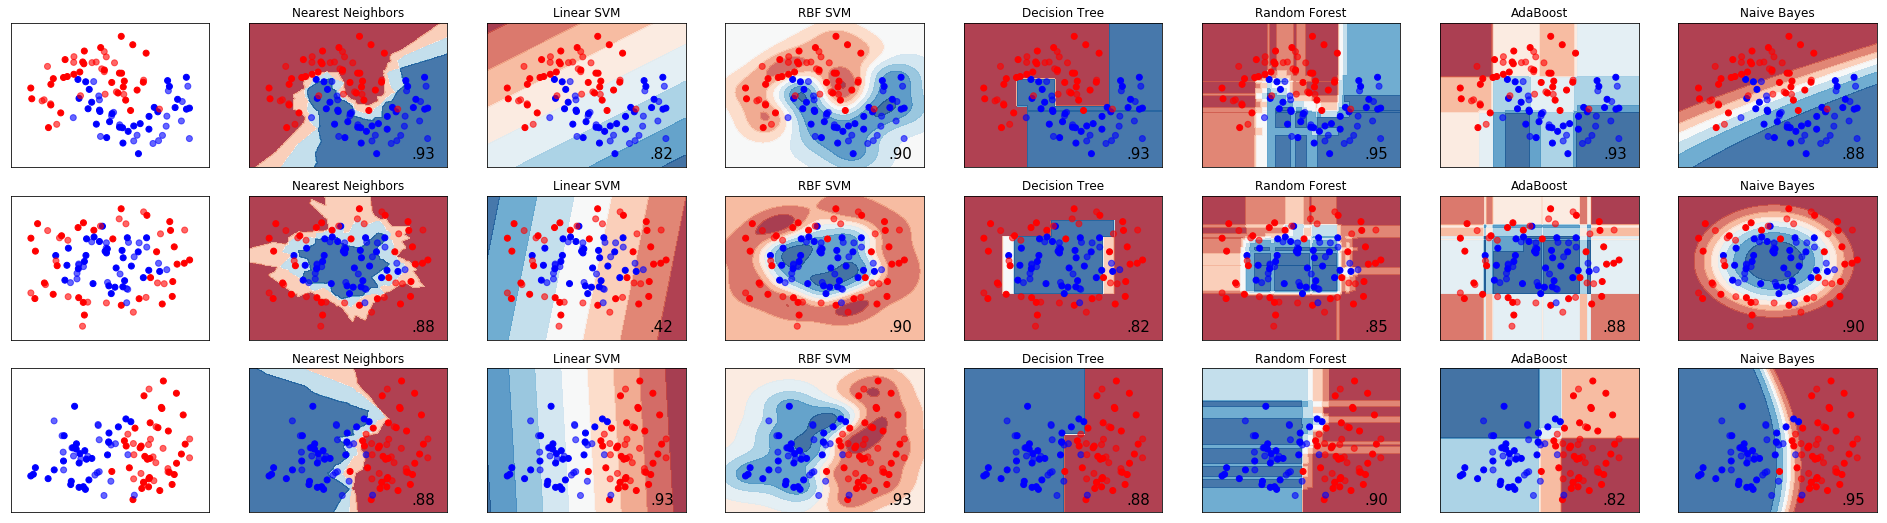

In [14]:
# 与其他机器学习分类算法进行对比：
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# SVN

    https://blog.csdn.net/csqazwsxedc/article/details/71513197
    
    https://blog.csdn.net/woaidapaopao/article/details/52664833
    
    https://blog.csdn.net/u010665216/article/details/78382984
    
    SVM是作为分类器在logisticregression的基础上引出的。其学习方法是把数据映射到一个高维空间上，使数据变稀疏，比较容易找到一个分割面来将数据分类，而这个高维的分割面就是超平面。而SVM做的就是找到这样一个超平面使得数据点离这个超平面尽可能的远，这样的分类效果才会好。
    Vapnik等人在多年研究统计学习理论基础上对线性分类器提出了另一种设计最佳准则。其原理也从线性可分说起，然后扩展到线性不可分的情况。甚至扩展到使用非线性函数中去，这种分类器被称为支持向量机（Support Vector Machine，简称SVM）。支持向量机的提出有很深的理论背景。

    SVM的主要思想可以概括为两点：
    1) 它是针对线性可分情况进行分析，对于线性不可分的情况，通过使用非线性映射算法将低维输入空间线性不可分的样本转化为高维特征空间使其线性可分，从而使得高维特征空间采用线性算法对样本的非线性特征进行线性分析成为可能。
    2) 它基于结构风险最小化理论之上在特征空间中构建最优超平面，使得学习器得到全局最优化，并且在整个样本空间的期望以某个概率满足一定上界。    
    
    一般特征    
    ⑴SVM学习问题可以表示为凸优化问题，因此可以利用已知的有效算法发现目标函数的全局最小值。而其他分类方法（如基于规则的分类器和人工神经网络）都采用一种基于贪心学习的策略来搜索假设空间，这种方法一般只能获得局部最优解。
    ⑵SVM通过最大化决策边界的边缘来控制模型的能力。尽管如此，用户必须提供其他参数，如使用核函数类型和引入松弛变量等。
    ⑶通过对数据中每个分类属性引入一个哑变量，SVM可以应用于分类数据。
    ⑷SVM一般只能用在二类问题，对于多类问题效果不好。    
    
    SVM可用于解决各种现实世界的问题：
    
    1) 支持向量机有助于文本和超文本分类，因为它们的应用程序可以显著减少对标准感应和转换设置中标记的训练实例的需求。
    2) 图像的分类也可以使用SVM进行。实验结果表明，只有三到四轮的相关性反馈，支持向量机的搜索精度要比传统的查询优化方案高得多。图像分割系统也是如此，包括使用Vapnik建议的使用特权方法的修改版SVM的系统。
    3)使用SVM可以识别手写字符。
    4)SVM算法已广泛应用于生物科学和其他科学领域。它们已被用于对高达90%正确分类的化合物进行蛋白质分类。已经提出基于SVM权重的置换测试作为解释SVM模型的机制。支持向量机权重也被用于解释过去的SVM模型。Posthoc解释支持向量机模型为了识别模型使用的特征进行预测是一个比较新的研究领域，在生物科学中具有特殊的意义。    
    
    SVM的潜在缺点包括以下几个方面：
    1) 需要对输入数据进行全面标注
    2)非校准类成员概率- SVM源于Vapnik的理论，避免了有限数据的估计概率
    3)SVM只适用于两类任务。因此，必须应用将多类任务减少到几个二进制问题的算法。
    4)求解模型的参数难以解释。    
    
    

# 朴素贝叶斯

# 决策树

  http://python.jobbole.com/86911/
  https://blog.csdn.net/ruggier/article/details/78756447
  
     
     决策树是一个非参数的监督式学习方法，主要用于分类和回归。算法的目标是通过推断数据特征，学习决策规则从而创建一个预测目标变量的模型。如下如所示，决策树通过一系列if-then-else 决策规则 近似估计一个正弦曲线。
     
    用决策树分类，从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子节点（每一个子节点对应着特征的一个取值）。递归的进行测试和分配，直至叶节点，得到分类结果。

    我们来举个例子，看一下决策树的决策过程。

    假设小明要出门了，需要选择一种出行方式，假设出行方式有以下几种：步行，自行车，驾车，地铁。如果距离很近，那么小明就选择步行，如果不是特别远，就选择自行车，如果特别远的话，就要选择驾车或地铁了。然后考虑今天是不是限号呢，不限号就驾车，限号就只能地铁了。
    
    决策树学习

    1）目标：决策树的学习，就是根据数据集构建出一棵决策树。我们希望构建出来的决策树，既能很好的对数据集进行分类，又具有很好的泛化能力。

    2）启发式学习：由于基于特征空间划分的类的条件概率模型有无限多个，从所有可能的决策树中选取最优化决策树是NP完全问题，所以现实中决策树学习算法是采用启发式方法，近似求解这一最优化问题，这样得到的决策树是次优的。也就是说现实中的决策树学习算法，一般是逐步构建决策树，每次选取的特征是保证最优划分的，但是这样的得到的决策树不一定是所有可能的决策树中最优的。

    3）学习过程：决策树学习算法通常就是递归的选择最优特征，兵器人根据该特征对训练集进行划分，在划分之后的训练集上再进行决策树学习算法，如果能够大致分类，则设置成叶节点，否则继续选择最优特征，知道所有的训练数据子集都能被正确的分类或者没有可选的特征为止。

    4）剪枝：这样的算法生成的决策树，一般对训练集的分类效果很好、但泛化能力不强，也就是说容易产生过拟合现象。因此需要对构建好的数据集进行剪枝，将树变得更简单，因而具有更好的泛化能力。

    可以看出决策树的学习算法一般包含三个过程：特征选择、决策树生成和决策树剪枝。    

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
 
clf.predict([[2., 2.]])
clf.predict_proba([[2., 2.]])        #计算属于每个类的概率

# 逻辑回归

# 蒙特卡罗搜索树   MCTS

   https://www.zhihu.com/question/39916945?sort=created
   
   https://jeffbradberry.com/posts/2015/09/intro-to-monte-carlo-tree-search/
   
    “蒙特卡洛树搜索”是一种启发式的搜索策略，能够基于对搜索空间的随机抽样来扩大搜索树，从而分析围棋这类游戏中每一步棋应该怎么走才能够创造最好机会。

    一位名叫苏椰的知乎用户举了这样一个例子，以通俗的语言进行了解释：假如筐里有100个苹果，让我每次闭眼拿1个，挑出最大的。于是我随机拿1个，再随机拿1个跟它比，留下大的，再随机拿1个……我每拿一次，留下的苹果都至少不比上次的小。拿的次数越多，挑出的苹果就越大，但我除非拿100次，否则无法肯定挑出了最大的。这个挑苹果的算法，就属于蒙特卡罗算法：尽量找好的，但不保证是最好的。
    
    蒙特卡罗树搜索(Monte Carlo Tree Search)并不是一种"模拟人"的算法。而是通过随机的对游戏进行推演来逐渐建立一棵不对称的搜索树的过程。可以看成是某种意义上的强化学习，当然这一点学界还有一些争议。蒙特卡罗树搜索大概可以被分成四步。选择(Selection)，拓展(Expansion)，模拟(Simulation)，反向传播(Backpropagation)。在开始阶段，搜索树只有一个节点，也就是我们需要决策的局面。搜索树中的每一个节点包含了三个基本信息：代表的局面，被访问的次数，累计评分。

    [1]选择(Selection)
        在选择阶段，需要从根节点，也就是要做决策的局面R出发向下选择出一个最急迫需要被拓展的节点N，局面R是是每一次迭代中第一个被检查的节点；     对于被检查的局面而言，他可能有三种可能：     1)该节点所有可行动作都已经被拓展过     2)该节点有可行动作还未被拓展过     3)这个节点游戏已经结束了(例如已经连成五子的五子棋局面)     

    对于这三种可能：     
        1)如果所有可行动作都已经被拓展过了，那么我们将使用UCB公式计算该节点所有子节点的UCB值，并找到值最大的一个子节点继续检查。反复向下迭代。     
        2)如果被检查的局面依然存在没有被拓展的子节点(例如说某节点有20个可行动作，但是在搜索树中才创建了19个子节点)，那么我们认为这个节点就是本次迭代的的目标节点N，并找出N还未被拓展的动作A。执行步骤[2]     
        3)如果被检查到的节点是一个游戏已经结束的节点。那么从该节点直接执行步骤{4]。每一个被检查的节点的被访问次数在这个阶段都会自增。在反复的迭代之后，我们将在搜索树的底端找到一个节点，来继续后面的步骤。[2]拓展(Expansion)在选择阶段结束时候，我们查找到了一个最迫切被拓展的节点N，以及他一个尚未拓展的动作A。在搜索树中创建一个新的节点Nn作为N的一个新子节点。Nn的局面就是节点N在执行了动作A之后的局面。[3]模拟(Simulation)为了让Nn得到一个初始的评分。我们从Nn开始，让游戏随机进行，直到得到一个游戏结局，这个结局将作为Nn的初始评分。一般使用胜利/失败来作为评分，只有1或者0。[4]反向传播(Backpropagation)在Nn的模拟结束之后，它的父节点N以及从根节点到N的路径上的所有节点都会根据本次模拟的结果来添加自己的累计评分。如果在[1]的选择中直接发现了一个游戏结局的话，根据该结局来更新评分。每一次迭代都会拓展搜索树，随着迭代次数的增加，搜索树的规模也不断增加。当到了一定的迭代次数或者时间之后结束，选择根节点下最好的子节点作为本次决策的结果。
        
        
        https://www.cnblogs.com/xmwd/p/python_game_based_on_MCTS_and_UCT_RAVE.html  python实现的基于蒙特卡洛树搜索(MCTS)与UCT RAVE的五子棋游戏
        https://www.baidu.com/s?wd=python%20%E8%92%99%E7%89%B9%E5%8D%A1%E7%BD%97%E6%A0%91%E6%90%9C%E7%B4%A2&rsv_spt=1&rsv_iqid=0xad3b7e850003d324&issp=1&f=8&rsv_bp=1&rsv_idx=2&ie=utf-8&rqlang=cn&tn=baiduhome_pg&rsv_enter=0&oq=python%2520%25E8%2592%2599%25E7%2589%25B9%25E5%258D%25A1%25E6%25B4%259B%25E5%2586%25B3%25E7%25AD%2596%25E6%25A0%2591&rsv_t=4efa4DddW0YV%2BlXHDVdwlKZTiYfQm72y33D%2BU%2Btpmjm2DMmI5sqGmVPUuX6gruMBH7Kg&sug=%25E8%2592%2599%25E7%2589%25B9%25E5%258D%25A1%25E6%25B4%259B%25E6%25A8%25A1%25E6%258B%259F&rsv_pq=e6008abf00000d46&rsv_sug3=44&rsv_sug1=30&rsv_sug7=100&rsv_n=2&rsv_sug2=0&inputT=9790&rsv_sug4=11632